In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

In [2]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

## Loading XCrystal configuration

In [3]:
xcr = XCrystal(XCr_path+'/config/C400_9p8keV_LaueAssymRefl15degFig2.yaml')
pp=xcr.configure(0,0)

Geometry file was provided
No deformation model was selected


In [4]:
xcr.cr_mask.shape

(4000, 1, 6000)

## Defining single realization reflection object

In [5]:

def single_realization_with_data(delta_theta,omega):
    
    xcr = XCrystal(XCr_path+'/config/C400_9p8keV_LaueAssymRefl15degFig2.yaml',omega)
    xcr.configure(delta_theta,0)
    xcr.run3D()
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field, xcr.u, xcr.M

In [6]:
omega0=9831

## Running beam propagation

In [7]:
U1_data = []
U2_data = []

Rs, Ts, U1_xyz, U2_xyz, up, MM = single_realization_with_data(20e-6,omega0)
U1_data.append(U1_xyz)
U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Geometry file was provided
No deformation model was selected


Beam propagation progress: 100%|██████████| 6000/6000 [00:33<00:00, 179.20it/s]


Photon energy (omega):  9831 ; Reflectivity:  0.9651702413573094 ; Transmission:  0.011780801388701264


## Determining relative phase between reflected and transmitted fields

In [8]:
ket12=np.sum(U1_xyz[0,:,0,:]*np.conj(U2_xyz[0,:,0,:]),axis=0)
ket21=np.sum(U2_xyz[0,:,0,:]*np.conj(U1_xyz[0,:,0,:]),axis=0)+1e-15
thet=np.unwrap(np.angle(-ket12/ket21))


In [9]:

Iy=0
Ints=np.abs(U1_xyz[0,:,:,:] + U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
Ints2=np.abs(U1_xyz[0,:,:,:]*0 + U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
Ints1=np.abs(U1_xyz[0,:,:,:] + 0*U2_xyz[0,:,:,:]*np.exp(1j*thet/2))**2
SumInts=np.abs(U1_xyz[0,:,:,:])**2 + np.abs(U2_xyz[0,:,:,:])**2

## Displaying results

(-1000.0, 1500.0)

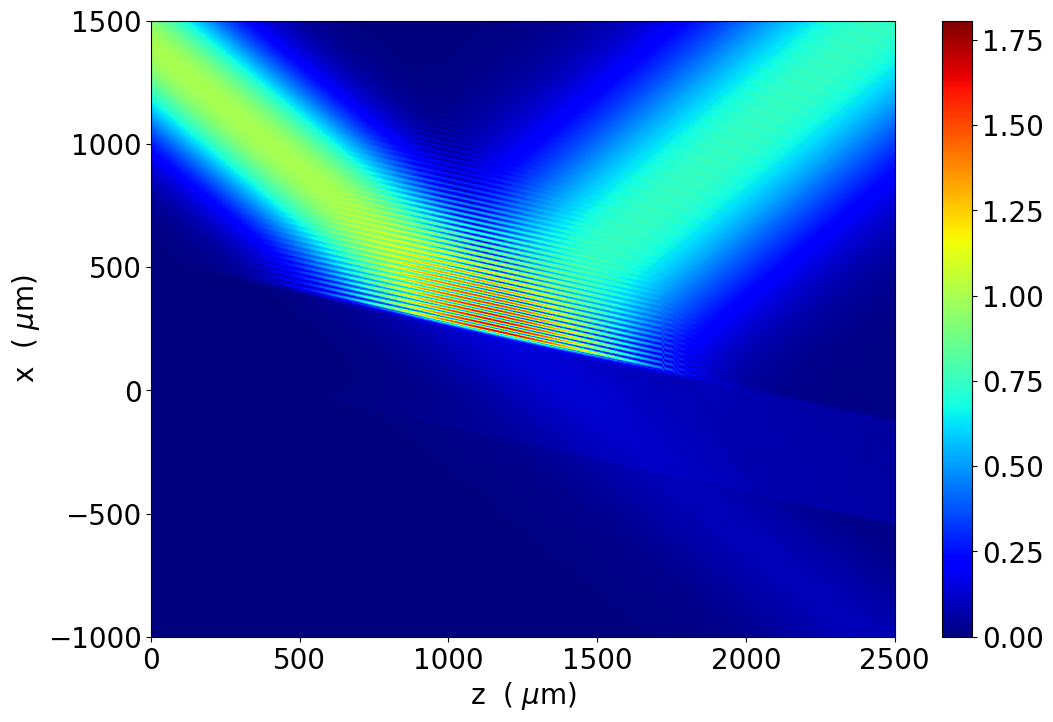

In [10]:
plt.imshow(Ints[:,Iy,:]**0.5,extent=[0,xcr.M*xcr.Z/xcr.convr*1e6,-xcr.xx.max()/xcr.convr*1e6,xcr.xx.max()/xcr.convr*1e6], aspect='auto',cmap='jet')
plt.ylabel(r'x  ( $\mu$m)')
plt.xlabel(r'z  ( $\mu$m)')
plt.colorbar()
#plt.xlim(5,6)
plt.ylim(-1000,1500)

In [11]:
xcr.xx.max()/xcr.convr*1e6

3000.0

In [12]:
t1 = time.time()
(t1-t0)

38.168787240982056

In [13]:
xcr.cr_mask.shape

(4000, 1, 6000)

In [14]:
 xcr.width

500